# Recommenders

In [1]:
import os
import sys

# ! Before importing tensorflow set devices (-1 for NO GPU Acceleration)
os.environ["CUDA_VISIBLE_DEVICES"]="-1"

if "../recommenders" not in sys.path:
    sys.path.insert(0,"../recommenders")

In [ ]:
print(sys.path)
sys.path

In [ ]:
from tempfile import TemporaryDirectory
import scrapbook as sb
import tensorflow as tf
tf.get_logger().setLevel('ERROR') # only show error messages

print(f"System version: {sys.version}")
print(f"Tensorflow version: {tf.__version__}")

In [ ]:
from recommenders_tests import load_small

### Load MIND - Dataset (DEMO)

#### Needed libraries

In [ ]:
import sys
import os
from tempfile import TemporaryDirectory

from recommenders.models.newsrec.io.mind_iterator import MINDIterator
from recommenders.models.newsrec.newsrec_utils import get_mind_data_set
from recommenders.models.deeprec.deeprec_utils import download_deeprec_resources
from recommenders.models.newsrec.newsrec_utils import prepare_hparams


#### Download demo-data for MIND if needed

Used code from: https://github.com/microsoft/recommenders/blob/main/examples/00_quick_start/naml_MIND.ipynb

In [11]:
mind_url, mind_train_dataset, mind_dev_dataset, mind_utils = get_mind_data_set("demo")
print(mind_url)
print(mind_train_dataset)
print(mind_utils)

https://recodatasets.z20.web.core.windows.net/newsrec/
MINDdemo_train.zip
MINDdemo_utils.zip


In [ ]:
tmpdir = TemporaryDirectory()
data_path = tmpdir.name

train_news_file = os.path.join(data_path, 'train', r'news.tsv')
train_behaviors_file = os.path.join(data_path, 'train', r'behaviors.tsv')
valid_news_file = os.path.join(data_path, 'valid', r'news.tsv')
valid_behaviors_file = os.path.join(data_path, 'valid', r'behaviors.tsv')
wordEmb_file = os.path.join(data_path, "utils", "embedding_all.npy")
userDict_file = os.path.join(data_path, "utils", "uid2index.pkl")
wordDict_file = os.path.join(data_path, "utils", "word_dict_all.pkl")
vertDict_file = os.path.join(data_path, "utils", "vert_dict.pkl")
subvertDict_file = os.path.join(data_path, "utils", "subvert_dict.pkl")
yaml_file = os.path.join(data_path, "utils", r'naml.yaml')

# Use demo code here
mind_url, mind_train_dataset, mind_dev_dataset, mind_utils = get_mind_data_set("demo")

if not os.path.exists(train_news_file):
    download_deeprec_resources(mind_url, os.path.join(data_path, 'train'), mind_train_dataset)
    
if not os.path.exists(valid_news_file):
    download_deeprec_resources(mind_url, \
                               os.path.join(data_path, 'valid'), mind_dev_dataset)
if not os.path.exists(yaml_file):
    download_deeprec_resources(r'https://recodatasets.z20.web.core.windows.net/newsrec/', \
                               os.path.join(data_path, 'utils'), mind_utils)

## Load MIND-Dataset SMALL
<a id = "load_small"></a>


In [62]:

data_path = "Dataset_small"

train_news_file = os.path.join(data_path, 'train', r'news.tsv')
train_behaviors_file = os.path.join(data_path, 'train', r'behaviors.tsv')
valid_news_file = os.path.join(data_path, 'valid', r'news.tsv')
valid_behaviors_file = os.path.join(data_path, 'valid', r'behaviors.tsv')
wordEmb_file = os.path.join(data_path, "utils", "embedding_all.npy")
userDict_file = os.path.join(data_path, "utils", "uid2index.pkl")
wordDict_file = os.path.join(data_path, "utils", "word_dict_all.pkl")
vertDict_file = os.path.join(data_path, "utils", "vert_dict.pkl")
subvertDict_file = os.path.join(data_path, "utils", "subvert_dict.pkl")

# Use yaml as needed
# yaml_file = os.path.join(data_path, "utils", r'naml.yaml')

# Use demo code here
mind_url, mind_train_dataset, mind_dev_dataset, mind_utils = get_mind_data_set("small")

if not os.path.exists(train_news_file):
    download_deeprec_resources(mind_url, os.path.join(data_path, 'train'), mind_train_dataset)
    
if not os.path.exists(valid_news_file):
    download_deeprec_resources(mind_url, \
                               os.path.join(data_path, 'valid'), mind_dev_dataset)
if not os.path.exists(yaml_file):
    download_deeprec_resources(r'https://recodatasets.z20.web.core.windows.net/newsrec/', \
                               os.path.join(data_path, 'utils'), mind_utils)

100%|██████████| 51.7k/51.7k [00:07<00:00, 6.59kKB/s]
100%|██████████| 30.2k/30.2k [00:03<00:00, 7.57kKB/s]
100%|██████████| 152k/152k [00:06<00:00, 23.8kKB/s] 


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

train_news_file
train_behaviors_file

data_news = pd.read_csv(train_news_file,delimiter="\t",)
data_behavoirs = pd.read_csv(train_behaviors_file,delimiter="\t")

data_news.columns=['News ID',
"Category",
"SubCategory",
"Title",
"Abstract",
"URL",
"Title Entities",
"Abstract Entities "]

data_behavoirs.columns = ['Impression ID', 'User ID', 'Time', 'History' , 'Impressions']



### Setup hyperparameters

In [ ]:
batch_size = 32
epochs = 5

seed = 42

hparams = prepare_hparams(yaml_file, 
                          wordEmb_file=wordEmb_file,
                          wordDict_file=wordDict_file, 
                          userDict_file=userDict_file,
                          vertDict_file=vertDict_file, 
                          subvertDict_file=subvertDict_file,
                          batch_size=batch_size,
                          epochs=epochs)

### Setup for WandB-Visualization

In [ ]:
!pip install wandb

## Most common models

### 1. Neural Recommendation with Long- and Short-term User Representations (LSTUR)

Paper: https://aclanthology.org/P19-1033.pdf

Code : https://github.com/microsoft/recommenders

In [ ]:
from recommenders.models.newsrec.models.lstur import LSTURModel

In [ ]:
model = LSTURModel(hparams,MINDAllIterator,42)

Run without training

In [ ]:
print(model.run_eval(valid_news_file,valid_behaviors_file))

In [ ]:
import tensorflow as tf
model.fit(train_news_file,train_behaviors_file,valid_news_file,valid_behaviors_file)


1085it [05:51,  3.09it/s]
0it [00:00, ?it/s]/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
18693it [00:35, 528.63it/s]
7507it [04:23, 28.44it/s]
7538it [00:01, 5387.19it/s]
at epoch 1
train info: logloss loss:1.4877065252049178
eval info: group_auc:0.5951, mean_mrr:0.2567, ndcg@10:0.3478, ndcg@5:0.2799
at epoch 1 , train time: 351.4 eval time: 311.0
<recommenders.models.newsrec.models.lstur.LSTURModel at 0x7ff306242390>

In [ ]:
for idx in range(2,5,1):
  model.fit(train_news_file,train_behaviors_file,valid_news_file,valid_behaviors_file)

1085it [05:42,  3.17it/s]
18693it [00:34, 537.72it/s]
7507it [04:16, 29.26it/s]
7538it [00:01, 5635.13it/s]
at epoch 1
train info: logloss loss:1.4073863327228529
eval info: group_auc:0.6251, mean_mrr:0.2773, ndcg@10:0.3703, ndcg@5:0.3056
at epoch 1 , train time: 342.7 eval time: 303.1
1085it [05:41,  3.18it/s]
18693it [00:35, 527.07it/s]
7507it [04:21, 28.76it/s]
7538it [00:01, 5443.98it/s]
at epoch 1
train info: logloss loss:1.3618857577099779
eval info: group_auc:0.6331, mean_mrr:0.2872, ndcg@10:0.38, ndcg@5:0.3165
at epoch 1 , train time: 341.7 eval time: 308.1
1085it [05:40,  3.18it/s]
18693it [00:33, 562.39it/s]
7507it [03:55, 31.91it/s]
7538it [00:01, 5645.08it/s]
at epoch 1
train info: logloss loss:1.3223843703072191
eval info: group_auc:0.6389, mean_mrr:0.2982, ndcg@10:0.3871, ndcg@5:0.3252
at epoch 1 , train time: 341.0 eval time: 280.0

In [ ]:
model.model.save_weights("/content/drive/MyDrive/Colab Notebooks/Masterthesis/Models/LSTUR/","LSTUR_weights")

In [ ]:
logs = []

# train info: logloss loss:0
# {'group_auc': 0.5102, 'mean_mrr': 0.219, 'ndcg@5': 0.2244, 'ndcg@10': 0.2852}
epoch_1 = {}
epoch_1["group_auc"] = 0.5102
epoch_1["mean_mrr"] = 0.219
epoch_1["ndcg@10"] = 0.2244
epoch_1["ndcg@5"] = 0.2852
epoch_1["logloss loss"] = 0

logs.append(epoch_1)

# train info: logloss loss:1.4877065252049178
# eval info: group_auc:0.5951, mean_mrr:0.2567, ndcg@10:0.3478, ndcg@5:0.2799

epoch_1 = {}
epoch_1["group_auc"] = 0.5951
epoch_1["mean_mrr"] = 0.2567
epoch_1["ndcg@10"] = 0.3478
epoch_1["ndcg@5"] = 0.2799
epoch_1["logloss loss"] = 1.4877065252049178

print(epoch_1)

logs.append(epoch_1)

# train info: logloss loss:1.4073863327228529
# eval info: group_auc:0.6251, mean_mrr:0.2773, ndcg@10:0.3703, ndcg@5:0.3056
epoch_1 = {}
epoch_1["group_auc"] = 0.6251
epoch_1["mean_mrr"] = 0.2773
epoch_1["ndcg@10"] = 0.3703
epoch_1["ndcg@5"] = 0.3056
epoch_1["logloss loss"] = 1.4073863327228529

logs.append(epoch_1)

#train info: logloss loss:1.3618857577099779
#eval info: group_auc:0.6331, mean_mrr:0.2872, ndcg@10:0.38, ndcg@5:0.3165

epoch_1 = {}
epoch_1["group_auc"] = 0.6331
epoch_1["mean_mrr"] = 0.2872
epoch_1["ndcg@10"] = 0.38
epoch_1["ndcg@5"] = 0.3165
epoch_1["logloss loss"] = 1.3618857577099779

logs.append(epoch_1)

# train info: logloss loss:1.3223843703072191
# eval info: group_auc:0.6389, mean_mrr:0.2982, ndcg@10:0.3871, ndcg@5:0.3252

epoch_1 = {}
epoch_1["group_auc"] = 0.6389
epoch_1["mean_mrr"] = 0.2982
epoch_1["ndcg@10"] = 0.3871
epoch_1["ndcg@5"] = 0.3252
epoch_1["logloss loss"] = 1.3223843703072191

logs.append(epoch_1)

for i in range(5):
  wandb.log(logs[i],i)



In [ ]:
wandb.log(logs[4],5)

In [ ]:
wandb.finish()

### 2. Neural Recommendation with Attentive Multi-View Learning (NAML)

Paper: https://arxiv.org/pdf/1907.05576.pdf

Code : https://github.com/wuch15/IJCAI2019-NAML

In [ ]:
import tensorflow as tf

from recommenders.models.newsrec.models.naml import NAMLModel

# MINDAallIterator is the iterator for the NAML model provided by recommenders
model = NAMLModel(hparams,MINDAllIterator,42)

Fitting demo data with NAML


In [ ]:
print(tf.config.list_physical_devices('GPU'))

model.fit(train_news_file,train_behaviors_file,valid_news_file,valid_behaviors_file)

#eval_vals = model.run_eval(valid_news_file, valid_behaviors_file)

In [ ]:
evals = model.run_eval(valid_news_file, valid_behaviors_file)

In [ ]:
wandb.init(project="recommenders_NAML")

In [ ]:
logs = []

# logloss loss:1.492940714502115
# group_auc:0.5917, mean_mrr:0.2593, ndcg@10:0.3485, ndcg@5:0.2843
epoch_1 = {}
epoch_1["group_auc"] = 0.5917
epoch_1["mean_mrr"] = 0.2593
epoch_1["ndcg@10"] = 0.3485
epoch_1["ndcg@5"] = 0.2843
epoch_1["logloss loss"] = 1.492940714502115

logs.append(epoch_1)

# logloss loss:1.4204849718902517
# group_auc:0.6147, mean_mrr:0.2776, ndcg@10:0.3714, ndcg@5:0.3093

epoch_1 = {}
epoch_1["group_auc"] = 0.6147
epoch_1["mean_mrr"] = 0.2776
epoch_1["ndcg@10"] = 0.3714
epoch_1["ndcg@5"] = 0.3093
epoch_1["logloss loss"] = 1.4204849718902517

print(epoch_1)

logs.append(epoch_1)

# logloss loss:1.3749229467409547
# group_auc:0.6234, mean_mrr:0.2792, ndcg@10:0.3742, ndcg@5:0.3084
epoch_1 = {}
epoch_1["group_auc"] = 0.6234
epoch_1["mean_mrr"] = 0.2792
epoch_1["ndcg@10"] = 0.3742
epoch_1["ndcg@5"] = 0.3084
epoch_1["logloss loss"] = 1.3749229467409547

logs.append(epoch_1)

# logloss loss:1.3430268440378426
# group_auc:0.6376, mean_mrr:0.2864, ndcg@10:0.3815, ndcg@5:0.3168

epoch_1 = {}
epoch_1["group_auc"] = 0.6376
epoch_1["mean_mrr"] = 0.2864
epoch_1["ndcg@10"] = 0.3815
epoch_1["ndcg@5"] = 0.3168
epoch_1["logloss loss"] = 1.3430268440378426

logs.append(epoch_1)

# logloss loss:1.3205334546928582
# group_auc:0.6307, mean_mrr:0.2867, ndcg@10:0.3793, ndcg@5:0.3148

epoch_1 = {}
epoch_1["group_auc"] = 0.6307
epoch_1["mean_mrr"] = 0.2867
epoch_1["ndcg@10"] = 0.3793
epoch_1["ndcg@5"] = 0.3148
epoch_1["logloss loss"] = 1.3205334546928582

logs.append(epoch_1)

for l in logs:
  wandb.log(l,)



Save trained model (!only run if model has been trained!)

In [ ]:
model.model.save_weights("/content/drive/MyDrive/Colab Notebooks/Masterthesis/Models/","NAML_weights")

In [ ]:
import pandas as pd
v = pd.read_csv(valid_news_file,"\t")
print(v.head())

### 3. Neural Recommendation with Personalized Attention (NPA)

Paper: https://arxiv.org/pdf/1907.05559.pdf

Code : https://github.com/wuch15/KDD-NPA

In [ ]:
import sys
import os
import numpy as np
import zipfile
from tqdm import tqdm
import scrapbook as sb
from tempfile import TemporaryDirectory
import tensorflow as tf
tf.get_logger().setLevel('ERROR') # only show error messages

from recommenders.models.deeprec.deeprec_utils import download_deeprec_resources 
from recommenders.models.newsrec.newsrec_utils import prepare_hparams
from recommenders.models.newsrec.models.npa import NPAModel
from recommenders.models.newsrec.io.mind_iterator import MINDIterator
from recommenders.models.newsrec.newsrec_utils import get_mind_data_set

print("System version: {}".format(sys.version))
print("Tensorflow version: {}".format(tf.__version__))

In [ ]:
epochs = 5
seed = 42
batch_size = 32

# Options: demo, small, large
MIND_type = 'demo'

tmpdir = TemporaryDirectory()
data_path = tmpdir.name

train_news_file = os.path.join(data_path, 'train', r'news.tsv')
train_behaviors_file = os.path.join(data_path, 'train', r'behaviors.tsv')
valid_news_file = os.path.join(data_path, 'valid', r'news.tsv')
valid_behaviors_file = os.path.join(data_path, 'valid', r'behaviors.tsv')
wordEmb_file = os.path.join(data_path, "utils", "embedding.npy")
userDict_file = os.path.join(data_path, "utils", "uid2index.pkl")
wordDict_file = os.path.join(data_path, "utils", "word_dict.pkl")
yaml_file = os.path.join(data_path, "utils", r'npa.yaml')

mind_url, mind_train_dataset, mind_dev_dataset, mind_utils = get_mind_data_set(MIND_type)

if not os.path.exists(train_news_file):
    download_deeprec_resources(mind_url, os.path.join(data_path, 'train'), mind_train_dataset)
    
if not os.path.exists(valid_news_file):
    download_deeprec_resources(mind_url, \
                               os.path.join(data_path, 'valid'), mind_dev_dataset)
if not os.path.exists(yaml_file):
    download_deeprec_resources(r'https://recodatasets.z20.web.core.windows.net/newsrec/', \
                               os.path.join(data_path, 'utils'), mind_utils)

In [ ]:
hparams = prepare_hparams(yaml_file, 
                          wordEmb_file=wordEmb_file,
                          wordDict_file=wordDict_file, 
                          userDict_file=userDict_file,
                          batch_size=batch_size,
                          epochs=epochs)
print(hparams)

In [ ]:
from recommenders.models.newsrec.models.npa import NPAModel

# MINDAallIterator is the iterator for the NPA model provided by recommenders
model = NPAModel(hparams,MINDAllIterator,42)

In [ ]:
model = NPAModel(hparams, MINDIterator, seed=seed)

In [ ]:
model.run_eval(valid_news_file,valid_behaviors_file)

In [ ]:
model.fit(train_news_file,train_behaviors_file,valid_news_file,valid_behaviors_file)

In [ ]:
import wandb
wandb.init(project="recommenders_NAML")

In [ ]:
logs = []

# train info: logloss loss:0
# {'group_auc': 0.5229, 'mean_mrr': 0.2328, 'ndcg@10': 0.303, 'ndcg@5': 0.2376}
epoch_1 = {}
epoch_1["group_auc"] = 0.5229
epoch_1["mean_mrr"] = 0.2328
epoch_1["ndcg@10"] = 0.303
epoch_1["ndcg@5"] = 0.2376
epoch_1["logloss loss"] = 0

logs.append(epoch_1)

# train info: logloss loss:1.5230483573005564
# eval info: group_auc:0.5738, mean_mrr:0.247, ndcg@10:0.3324, ndcg@5:0.2635

epoch_1 = {}
epoch_1["group_auc"] = 0.5738
epoch_1["mean_mrr"] = 0.247
epoch_1["ndcg@10"] = 0.3324
epoch_1["ndcg@5"] = 0.2635
epoch_1["logloss loss"] = 1.5230483573005564

print(epoch_1)

logs.append(epoch_1)

#train info: logloss loss:1.410849888241313
# eval info: group_auc:0.5926, mean_mrr:0.2636, ndcg@10:0.3488, ndcg@5:0.2863
epoch_1 = {}
epoch_1["group_auc"] = 0.5926
epoch_1["mean_mrr"] = 0.2636
epoch_1["ndcg@10"] = 0.3488
epoch_1["ndcg@5"] = 0.2863
epoch_1["logloss loss"] = 1.410849888241313

logs.append(epoch_1)

#train info: logloss loss:1.350137528903357
# eval info: group_auc:0.5997, mean_mrr:0.2699, ndcg@10:0.3581, ndcg@5:0.2927

epoch_1 = {}
epoch_1["group_auc"] = 0.5997
epoch_1["mean_mrr"] = 0.2699
epoch_1["ndcg@10"] = 0.3581
epoch_1["ndcg@5"] = 0.2927
epoch_1["logloss loss"] = 1.350137528903357

logs.append(epoch_1)

# train info: logloss loss:1.297524843591353
# eval info: group_auc:0.5957, mean_mrr:0.2693, ndcg@10:0.3557, ndcg@5:0.292

epoch_1 = {}
epoch_1["group_auc"] = 0.5957
epoch_1["mean_mrr"] = 0.2693
epoch_1["ndcg@10"] = 0.3557
epoch_1["ndcg@5"] = 0.292
epoch_1["logloss loss"] = 1.297524843591353

logs.append(epoch_1)

# train info: logloss loss:1.2605716042206871
# eval info: group_auc:0.5975, mean_mrr:0.2695, ndcg@10:0.3574, ndcg@5:0.2914


epoch_1 = {}
epoch_1["group_auc"] = 0.5975
epoch_1["mean_mrr"] = 0.2695
epoch_1["ndcg@10"] = 0.3574
epoch_1["ndcg@5"] = 0.2914
epoch_1["logloss loss"] = 1.2605716042206871
logs.append(epoch_1)


for i in range(5):
  wandb.log(logs[i],i)

wandb.log(logs[4],5)

wandb.log(logs[5],6)

In [ ]:
wandb.finish()

In [ ]:
model.model.save_weights("/content/drive/MyDrive/Colab Notebooks/Masterthesis/Models/NPA/","NPA_weights")

### 4.Neural Recommendation with Multi-Head Self-Attention (NRMS)

Paper: https://aclanthology.org/D19-1671.pdf

Code : https://github.com/aqweteddy/NRMS-Pytorch || https://github.com/wuch15/EMNLP2019-NRMS

In [ ]:
from recommenders.models.newsrec.models.nrms import NRMSModel

# MINDAallIterator is the iterator for the NAML model provided by recommenders
model = NRMSModel(hparams,MINDAllIterator,42)

wandb.init(project="recommenders_NAML")

In [ ]:
print(model.run_eval(valid_news_file, valid_behaviors_file))
model.fit(train_news_file,train_behaviors_file,valid_news_file, valid_behaviors_file)

In [ ]:
logs = []

# train info: logloss loss:0
# {'group_auc': 0.4796, 'mean_mrr': 0.206, 'ndcg@5': 0.204, 'ndcg@10': 0.2704}
epoch_1 = {}
epoch_1["group_auc"] = 0.4796
epoch_1["mean_mrr"] = 0.206
epoch_1["ndcg@10"] = .2704
epoch_1["ndcg@5"] = 0.204
epoch_1["logloss loss"] = 0

logs.append(epoch_1)

# train info: logloss loss:1.5073325152770716
# eval info: group_auc:0.5827, mean_mrr:0.2467, ndcg@10:0.3337, ndcg@5:0.262

epoch_1 = {}
epoch_1["group_auc"] = 0.5827
epoch_1["mean_mrr"] = 0.2467
epoch_1["ndcg@10"] = 0.3337
epoch_1["ndcg@5"] = 0.262
epoch_1["logloss loss"] = 1.5073325152770716

print(epoch_1)

logs.append(epoch_1)

#train info: logloss loss:1.4173318097118959
#eval info: group_auc:0.6035, mean_mrr:0.2589, ndcg@10:0.3496, ndcg@5:0.2768
epoch_1 = {}
epoch_1["group_auc"] = 0.6035
epoch_1["mean_mrr"] = 0.2589
epoch_1["ndcg@10"] = 0.3496
epoch_1["ndcg@5"] = 0.2768
epoch_1["logloss loss"] = 1.4173318097118959

logs.append(epoch_1)

#train info: logloss loss:1.3772375062863398
#eval info: group_auc:0.6092, mean_mrr:0.2671, ndcg@10:0.3593, ndcg@5:0.2868

epoch_1 = {}
epoch_1["group_auc"] = 0.6092
epoch_1["mean_mrr"] = 0.2671
epoch_1["ndcg@10"] = 0.3593
epoch_1["ndcg@5"] = 0.2868
epoch_1["logloss loss"] = 1.3772375062863398

logs.append(epoch_1)

# train info: logloss loss:1.35041045747045
# eval info: group_auc:0.6147, mean_mrr:0.2723, ndcg@10:0.3652, ndcg@5:0.2958

epoch_1 = {}
epoch_1["group_auc"] = 0.6147
epoch_1["mean_mrr"] = 0.2723
epoch_1["ndcg@10"] = 0.3652
epoch_1["ndcg@5"] = 0.2958
epoch_1["logloss loss"] = 1.35041045747045

logs.append(epoch_1)

for i in range(5):
  wandb.log(logs[i],i)

wandb.log(logs[4],5)

In [ ]:
# train info: logloss loss:1.3277907189685627
# eval info: group_auc:0.6138, mean_mrr:0.2733, ndcg@10:0.3662, ndcg@5:0.2955


epoch_1 = {}
epoch_1["group_auc"] = 0.6138
epoch_1["mean_mrr"] = 0.2733
epoch_1["ndcg@10"] = 0.3662
epoch_1["ndcg@5"] = 0.2955
epoch_1["logloss loss"] = 1.3277907189685627

logs.append(epoch_1)
wandb.log(logs[5],6)


In [ ]:
wandb.finish()

In [ ]:
model.model.save_weights("/content/drive/MyDrive/Colab Notebooks/Masterthesis/Models/NRMS/","NRMS_weights")

### Deep Knowledge-Aware Network for News Recommendation

Paper: https://arxiv.org/pdf/1801.08284.pdf

Code: https://github.com/microsoft/recommenders

In [ ]:
# Needed imports
from recommenders.models.deeprec.deeprec_utils import download_deeprec_resources, prepare_hparams
from recommenders.models.deeprec.models.dkn import DKN
from recommenders.models.deeprec.io.dkn_iterator import DKNTextIterator

In [ ]:
tmpdir = TemporaryDirectory()
data_path = os.path.join(tmpdir.name, "mind-demo-dkn")

yaml_file = os.path.join(data_path, r'dkn.yaml')
train_file = os.path.join(data_path, r'train_mind_demo.txt')
valid_file = os.path.join(data_path, r'valid_mind_demo.txt')
test_file = os.path.join(data_path, r'test_mind_demo.txt')
news_feature_file = os.path.join(data_path, r'doc_feature.txt')
user_history_file = os.path.join(data_path, r'user_history.txt')
wordEmb_file = os.path.join(data_path, r'word_embeddings_100.npy')
entityEmb_file = os.path.join(data_path, r'TransE_entity2vec_100.npy')
contextEmb_file = os.path.join(data_path, r'TransE_context2vec_100.npy')
if not os.path.exists(yaml_file):
    download_deeprec_resources(r'https://recodatasets.z20.web.core.windows.net/deeprec/', tmpdir.name, 'mind-demo-dkn.zip')

In [ ]:
epochs = 5
history_size = 50
batch_size = 100

hparams = prepare_hparams(yaml_file,
                          news_feature_file = news_feature_file,
                          user_history_file = user_history_file,
                          wordEmb_file=wordEmb_file,
                          entityEmb_file=entityEmb_file,
                          contextEmb_file=contextEmb_file,
                          epochs=epochs,
                          history_size=history_size,
                          batch_size=batch_size)

In [ ]:
model = DKN(hparams, DKNTextIterator)

In [ ]:
import wandb

In [ ]:
wandb.init(project = "recommenders_NAML")

In [ ]:
wandb.log(model.run_eval(valid_file))

In [ ]:
model.fit(train_file, valid_file)

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [ ]:
os.environ["CUDA_VISIBLE_DEVICES"]="-1"

# Learn and Visualize

In [ ]:
# Necessary imports

import sys
import os

if "../recommenders" not in sys.path:
    sys.path.insert(0,"../recommenders")
    
# ! Before importing tensorflow set devices (-1 for NO GPU Acceleration)
os.environ["CUDA_VISIBLE_DEVICES"]="-1"

from tempfile import TemporaryDirectory
import scrapbook as sb
import tensorflow as tf
print(f"System version: {sys.version}")
print(f"Tensorflow version: {tf.__version__}")
tf.get_logger().setLevel('ERROR') # only show error messages

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Imports for the preprocessed mind data / pretrained embeddings
from recommenders.models.newsrec.io.mind_iterator import MINDIterator
from recommenders.models.newsrec.newsrec_utils import get_mind_data_set
from recommenders.models.deeprec.deeprec_utils import download_deeprec_resources
from recommenders.models.deeprec.deeprec_utils import prepare_hparams as prepare_hparams_dr
from recommenders.models.newsrec.newsrec_utils import prepare_hparams

# Import for the models
##  Newsrec models
from recommenders.models.newsrec.models.lstur import LSTURModel
from recommenders.models.newsrec.models.naml import NAMLModel
from recommenders.models.newsrec.models.npa import NPAModel
from recommenders.models.newsrec.models.nrms import NRMSModel

##  Deeprec models
from recommenders.models.deeprec.models.dkn import DKN
from recommenders.models.deeprec.io.dkn_iterator import DKNTextIterator


In [3]:
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
# Files needed for News recommendation models (NPA,NAML,NRMS,LSTUR)
tmpdir = TemporaryDirectory()
data_path = tmpdir.name

train_news_file = os.path.join(data_path, 'train', r'news.tsv')
train_behaviors_file = os.path.join(data_path, 'train', r'behaviors.tsv')
valid_news_file = os.path.join(data_path, 'valid', r'news.tsv')
valid_behaviors_file = os.path.join(data_path, 'valid', r'behaviors.tsv')
wordEmb_file = os.path.join(data_path, "utils", "embedding_all.npy")
userDict_file = os.path.join(data_path, "utils", "uid2index.pkl")
wordDict_file = os.path.join(data_path, "utils", "word_dict_all.pkl")
vertDict_file = os.path.join(data_path, "utils", "vert_dict.pkl")
subvertDict_file = os.path.join(data_path, "utils", "subvert_dict.pkl")
yaml_file = os.path.join(data_path, "utils", r'naml.yaml')

# Use demo code here
mind_url, mind_train_dataset, mind_dev_dataset, mind_utils = get_mind_data_set("demo")

if not os.path.exists(train_news_file):
    download_deeprec_resources(mind_url, os.path.join(data_path, 'train'), mind_train_dataset)
    
if not os.path.exists(valid_news_file):
    download_deeprec_resources(mind_url, \
                               os.path.join(data_path, 'valid'), mind_dev_dataset)
if not os.path.exists(yaml_file):
    download_deeprec_resources(r'https://recodatasets.z20.web.core.windows.net/newsrec/', \
                               os.path.join(data_path, 'utils'), mind_utils)


# Files needed for Deep News recommendation models (DKN)
data_path_dkn = os.path.join(tmpdir.name, "mind-demo-dkn")

yaml_file_dkn = os.path.join(data_path_dkn, r'dkn.yaml')
train_file_dkn = os.path.join(data_path_dkn, r'train_mind_demo.txt')
valid_file_dkn = os.path.join(data_path_dkn, r'valid_mind_demo.txt')
test_file_dkn = os.path.join(data_path_dkn, r'test_mind_demo.txt')
news_feature_file_dkn = os.path.join(data_path_dkn, r'doc_feature.txt')
user_history_file_dkn = os.path.join(data_path_dkn, r'user_history.txt')
wordEmb_file_dkn = os.path.join(data_path_dkn, r'word_embeddings_100.npy')
entityEmb_file_dkn = os.path.join(data_path_dkn, r'TransE_entity2vec_100.npy')
contextEmb_file_dkn = os.path.join(data_path_dkn, r'TransE_context2vec_100.npy')
if not os.path.exists(yaml_file_dkn):
    download_deeprec_resources(r'https://recodatasets.z20.web.core.windows.net/deeprec/', tmpdir.name, 'mind-demo-dkn.zip')


100%|██████████| 17.0k/17.0k [00:01<00:00, 12.8kKB/s]
100%|██████████| 9.84k/9.84k [00:01<00:00, 8.26kKB/s]
100%|██████████| 95.0k/95.0k [00:04<00:00, 20.9kKB/s]
100%|██████████| 11.3k/11.3k [00:01<00:00, 10.2kKB/s]


In [3]:
epochs = 10
seed = 42
# Batch size for Newsrec models 
batch_size = 32

history_size = 50

Setup all needed hyperparameters for the models

In [4]:
hparams = {}

hparams["lstur"] = prepare_hparams(yaml_file, 
                          wordEmb_file=wordEmb_file,
                          wordDict_file=wordDict_file, 
                          userDict_file=userDict_file,
                          vertDict_file=vertDict_file, 
                          subvertDict_file=subvertDict_file,
                          batch_size=batch_size,
                          epochs=epochs)
hparams["naml"] = prepare_hparams(yaml_file, 
                          wordEmb_file=wordEmb_file,
                          wordDict_file=wordDict_file, 
                          userDict_file=userDict_file,
                          vertDict_file=vertDict_file, 
                          subvertDict_file=subvertDict_file,
                          batch_size=batch_size,
                          epochs=epochs)

hparams["npa"] = prepare_hparams(yaml_file, 
                          wordEmb_file=wordEmb_file,
                          wordDict_file=wordDict_file, 
                          userDict_file=userDict_file,
                          vertDict_file=vertDict_file, 
                          subvertDict_file=subvertDict_file,
                          batch_size=batch_size,
                          epochs=epochs)


hparams["nrms"] = prepare_hparams(yaml_file, 
                          wordEmb_file=wordEmb_file,
                          wordDict_file=wordDict_file, 
                          userDict_file=userDict_file,
                          vertDict_file=vertDict_file, 
                          subvertDict_file=subvertDict_file,
                          batch_size=batch_size,
                          epochs=epochs)

hparams["dkn"] = prepare_hparams_dr(yaml_file_dkn,
                          news_feature_file = news_feature_file_dkn,
                          user_history_file = user_history_file_dkn,
                          wordEmb_file=wordEmb_file_dkn,
                          entityEmb_file=entityEmb_file_dkn,
                          contextEmb_file=contextEmb_file_dkn,
                          epochs=epochs,
                          history_size=history_size,
                          batch_size=100)

In [5]:
hparams["test"] = prepare_hparams(yaml_file, 
                          wordEmb_file=wordEmb_file,
                          wordDict_file=wordDict_file, 
                          userDict_file=userDict_file,
                          vertDict_file=vertDict_file, 
                          subvertDict_file=subvertDict_file,
                          batch_size=1,
                          epochs=epochs)

WandB

In [8]:
import wandb
wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: lakin. Use `wandb login --relogin` to force relogin


True

In [ ]:
wandb.init(project="NewsRecommendationModels",name="LSTUR",reinit=True)
lstur = LSTURModel(hparams["lstur"],MINDIterator,seed)

wandb.log(lstur.run_eval(valid_news_file,valid_behaviors_file))
lstur.fit(train_news_file, train_behaviors_file, valid_news_file, valid_behaviors_file)

wandb.finish()

In [ ]:
print(tf.config.list_physical_devices('GPU'))

In [ ]:
from recommenders.models.newsrec.io.mind_all_iterator import MINDAllIterator

In [ ]:
wandb.init(project="NewsRecommendationModels",name="NAML",reinit=True)
naml = NAMLModel(hparams["naml"],MINDAllIterator,seed)

wandb.log(naml.run_eval(valid_news_file,valid_behaviors_file))
naml.fit(train_news_file, train_behaviors_file, valid_news_file, valid_behaviors_file)

wandb.finish()

In [ ]:
wandb.init(project="Run_Recmetrics",name="NRMS",reinit=True)
nrms = NRMSModel(hparams["nrms"],MINDIterator,seed)

wandb.log(nrms.run_eval(valid_news_file,valid_behaviors_file))
nrms.fit(train_news_file, train_behaviors_file, valid_news_file, valid_behaviors_file)

wandb.finish()

In [ ]:
wandb.init(project="NewsRecommendationModels",name="NPA",reinit=True)
npa = NRMSModel(hparams["npa"],MINDIterator,seed)

wandb.log(npa.run_eval(valid_news_file,valid_behaviors_file))
npa.fit(train_news_file, train_behaviors_file, valid_news_file, valid_behaviors_file)

wandb.finish()

In [ ]:
wandb.init(project="NewsRecommendationModels",name="DKN",reinit=True)
dkn = DKN(hparams["dkn"],DKNTextIterator)

wandb.log(dkn.run_eval(valid_file_dkn))
dkn.fit(train_file_dkn, valid_file_dkn)

wandb.finish()

In [ ]:
wandb.finish()

## RecMetrics

In [ ]:
print(tf.config.list_physical_devices())

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

train_news_file
train_behaviors_file

data_news = pd.read_csv(train_news_file,delimiter="\t",names = ['News ID',
"Category",
"SubCategory",
"Title",
"Abstract",
"URL",
"Title Entities",
"Abstract Entities "])

data_behaviors = pd.read_csv(train_behaviors_file,delimiter="\t",names=['Impression ID', 'User ID', 'Time', 'History' , 'Impressions'])


# data_behaviors.columns = ['Impression ID', 'User ID', 'Time', 'History' , 'Impressions']

In [7]:
data_behaviors_val = pd.read_csv(valid_behaviors_file,delimiter="\t",names=['Impression ID', 'User ID', 'Time', 'History' , 'Impressions'])
data_news_val = pd.read_csv(valid_news_file,delimiter="\t",names = ['News ID',
"Category",
"SubCategory",
"Title",
"Abstract",
"URL",
"Title Entities",
"Abstract Entities "])

In [11]:
data_behaviors_val.head()

,Impression ID,User ID,Time,History,Impressions
0,1,U41827,11/15/2019 2:41:03 PM,N15366 N12202 N27489 N19773 N21134 N18191 N686...,N23699-0 N21291-0 N1901-0 N27292-0 N17443-0 N1...
1,2,U61881,11/15/2019 10:31:42 AM,N16469 N4202 N4202 N21816 N12992 N24242 N7366 ...,N26916-0 N4641-0 N25522-0 N14893-0 N19035-0 N3...
2,3,U54180,11/15/2019 5:36:17 AM,N22427 N16386 N24242 N4385 N14672 N12242 N1852...,N13528-0 N27689-0 N10879-0 N11662-0 N14409-0 N...
3,4,U41164,11/15/2019 9:13:44 AM,N13065 N5748 N12658 N276 N7395 N16010 N13761 N...,N20150-0 N1807-1 N26916-0 N28138-0 N9576-0 N19...
4,5,U8588,11/15/2019 5:39:04 AM,N6629 N4958 N10917 N27079 N828,N21325-0 N5982-0 N19737-1 N9576-0 N20150-0 N25...


In [108]:
data_news_val.loc[data_news_val["News ID"] == "N23699"]

,News ID,Category,SubCategory,Title,Abstract,URL,Title Entities,Abstract Entities
15227,N23699,news,newsus,3 Indiana judges suspended after a night of dr...,Hours before they were to attend an educationa...,https://www.msn.com/en-us/news/newsus/3-indian...,"[{""Label"": ""White Castle (restaurant)"", ""Type""...","[{""Label"": ""Indianapolis"", ""Type"": ""G"", ""Wikid..."


In [62]:
data_behaviors.head()

,Impression ID,User ID,Time,History,Impressions
0,1,U82271,11/11/2019 3:28:58 PM,N3130 N11621 N12917 N4574 N12140 N9748,N13390-0 N7180-0 N20785-0 N6937-0 N15776-0 N25...
1,2,U84185,11/12/2019 10:36:47 AM,N27209 N11723 N4617 N12320 N11333 N24461 N2211...,N13089-0 N18101-0 N1248-0 N26273-0 N12770-1 N1...
2,3,U11552,11/11/2019 1:03:52 PM,N2139,N18390-0 N10537-0 N23967-1
3,4,U68381,11/11/2019 6:44:05 AM,N27420 N11621 N25416 N25457 N5124 N11751 N1175...,N15660-0 N18609-0 N2831-0 N5677-0 N19010-0 N15...
4,5,U52303,11/12/2019 3:11:52 AM,N1332 N12667,N15645-0 N7911-1


/home/langenhagen/miniconda3/envs/tf_newsrec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/langenhagen/miniconda3/envs/tf_newsrec/lib/python3.9/site-packages/recmetrics/plots.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  head = head.append(tail.head(1))


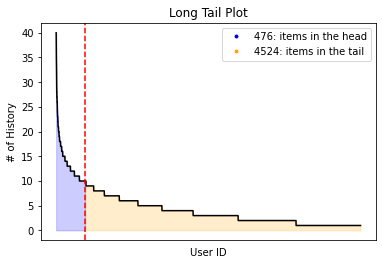

In [4]:
import recmetrics
recmetrics.long_tail_plot(
    df=data_behaviors,
    item_id_column='User ID',
    interaction_type = "History",
    percentage = 0.3,
    x_labels = False
)